In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import os

#Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

## Data Cleaning

In [2]:
os.chdir('D:\Bharati AXA Data')
data = pd.read_csv('insurance_claims.csv')

In [3]:
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [4]:
data.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

Since there are <b>NA</b> values in the dataset, let's drop them and parse date columns as DateTime. Also drop unwanted columns by modifying read_csv 

In [5]:
data = pd.read_csv('insurance_claims.csv', 
                   usecols= ['months_as_customer', 
                             'age', 
                             'policy_bind_date',
                             'policy_state',
                             'policy_csl',
                             'policy_deductable',
                             'policy_annual_premium',
                             'umbrella_limit',
                             'insured_zip',
                             'insured_sex',
                             'insured_education_level',
                             'insured_occupation',
                             'insured_hobbies',
                             'insured_relationship',
                             'capital-gains',
                             'capital-loss',
                             'incident_date',
                             'incident_type',
                             'collision_type',
                             'incident_severity',
                             'authorities_contacted',
                             'incident_state',
                             'incident_city',
                             'incident_hour_of_the_day',
                             'number_of_vehicles_involved',
                             'property_damage',
                             'bodily_injuries',
                             'witnesses',
                             'police_report_available',
                             'total_claim_amount',
                             'injury_claim',
                             'property_claim',
                             'vehicle_claim',
                             'auto_year',
                             'fraud_reported'], 
                   na_values=['?'], na_filter = True, parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [6]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,0,0,NaN,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NaN,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N


## Handling mising values

In [7]:
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [8]:
data.shape

(1000, 35)

Dropping <b>360 columns</b> from a dataset(containing NaN) that contains <b>1000 columns</b> might lead to a considerable loss of data. Since all three columns that contain NaN values are of categorical type, let's <b>replace</b> with it's <b>most occuring value i.e. mode

Replacing <b>NaN</b> in all three columns individually

In [9]:
data['collision_type'].fillna(data['collision_type'].value_counts().index[0], inplace = True)

In [10]:
data['property_damage'].fillna(data['property_damage'].value_counts().index[0], inplace = True)

In [11]:
data['police_report_available'].fillna(data['police_report_available'].value_counts().index[0], inplace = True)

In [12]:
data.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,0,0,NO,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N
5,256,39,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,...,NO,0,2,NO,64100,6410,6410,51280,2003,Y
6,137,34,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,...,NO,0,0,NO,78650,21450,7150,50050,2012,N
7,165,37,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,...,NO,2,2,YES,51590,9380,9380,32830,2015,N
8,27,33,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,...,NO,1,1,YES,27700,2770,2770,22160,2012,N
9,212,42,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,...,NO,2,1,NO,42300,4700,4700,32900,1996,N


In [13]:
data.to_csv('D:\Bharati AXA Data\Data after cleaning.csv', index = False)

<b>Checking whether any column is left with NaN

In [14]:
data.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [15]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

# EDA - Plotting

Let’s see how many have been reported

In [16]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

247 cases of fraud were reported and 753 weren't reported ever

Let's plot <b>fraud reported v/s Gender</b> by <b>binning Age

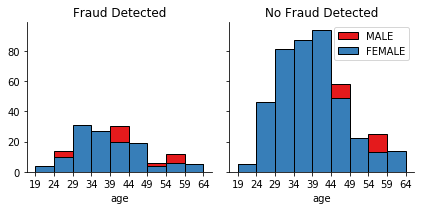

In [17]:
bins = np.linspace(data.age.min(), data.age.max(), 10)
g = sns.FacetGrid(data, col='fraud_reported', hue = 'insured_sex', palette='Set1', col_wrap=2, size = 3)
g.map(plt.hist,'age', bins=bins, ec="k")

g.axes[-1].legend()
g.set(xticks = bins)

#Change Titles
axes = g.axes.flatten()
axes[0].set_title("Fraud Detected")
axes[1].set_title("No Fraud Detected")

plt.show()

(array([1., 0., 0., 0.]),
 array([ 0.  ,  5.75, 11.5 , 17.25, 23.  ]),
 <a list of 4 Patch objects>)

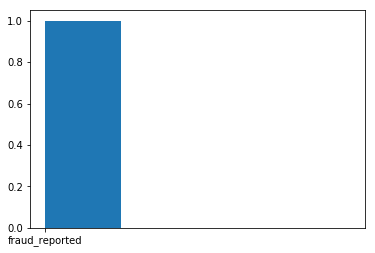

In [18]:
bins1 = np.linspace(data.incident_hour_of_the_day.min(), data.incident_hour_of_the_day.max(), 5)

plt.hist('fraud_reported', bins = bins1)

Let's plot incident numbers state wise

# Feature Selection

In [19]:
data[['policy_state', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']].describe()

,policy_state,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted
count,1000,1000,1000,1000,1000,1000,1000
unique,3,7,14,4,3,4,5
top,OH,JD,machine-op-inspct,Multi-vehicle Collision,Rear Collision,Minor Damage,Police
freq,352,161,93,419,470,354,292


Let's drop first 2 columns since they have very high unique values which will lead to higher number of states. Also, dropping other columns that wouldn't be required for modeling 

In [20]:
data.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim'], axis = 1, inplace = True)

In [21]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,Major Damage,5,1,1,2,YES,71610,2004,Y
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,Minor Damage,8,1,0,0,NO,5070,2007,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,Minor Damage,7,3,2,3,NO,34650,2007,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,Major Damage,5,1,1,2,NO,63400,2014,Y
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,Minor Damage,20,1,0,1,NO,6500,2009,N


In [22]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
collision_type                  object
incident_severity               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
dtype: object

### Let's convert all categorical variable to numerical using ONE HOT ENCODING

In [23]:
data_onehot = data[['policy_state','insured_sex', 'collision_type', 'incident_severity', 'police_report_available']]

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
enc = OneHotEncoder(sparse = False)

In [26]:
enc.fit(data_onehot)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [27]:
data_onehot_transformed = enc.transform(data_onehot)

In [28]:
data_onehot_transformed

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [32]:
# Converting returned array into a DataFrame

data2 = pd.DataFrame(data_onehot_transformed, 
                     columns = ['OH', 'IN', 'IL', 
                                'Insured_Male', 'Insured_Female',
                                'Side_Collison','Rear _Collison','Front Collison',
                                'Major Damage','Minor Damage','Total Loss','Trivial Damage'
                                'Police Report available', 'Police report not available'])

ValueError: Shape of passed values is (14, 1000), indices imply (13, 1000)

In [ ]:
data2.head()

In [ ]:
data = pd.concat([data, data2], axis = 1)

In [ ]:
data.head()

In [ ]:
data.drop(['policy_state','insured_sex','collision_type', 'incident_severity'], axis = 1, inplace = True)

In [ ]:
data.isna().sum() # to check if we are left with any NaN

In [ ]:
data.dtypes

In [ ]:
data['fraud_reported'] = data['fraud_reported'].replace({'Y': 1, 'N': 0})

In [ ]:
data['fraud_reported'].head()

# Modeling

Define <b>Features</b> and <b>label

In [38]:
X = data.drop('fraud_reported', axis= 1)
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,IL,Insured_Male,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [39]:
y = data['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False, random_state=4 )

In [41]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 26) (700,)
Test set: (300, 26) (300,)


Let's fit various models and check it's accuracy

# Support Vector Machines(SVM)

In [42]:
from sklearn import svm

data_svm = svm.SVC(kernel = 'rbf', probability = True)

In [43]:
data_svm.fit(X_train, y_train)

ValueError: could not convert string to float: 'NO'

In [37]:
ypred_svm = data_svm.predict(X_test)
ypred_svm[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
acc_jacc_svm = jaccard_similarity_score(ypred_svm, y_test).round(2)
acc_jacc_svm

0.74

In [39]:
acc_f1_svm = f1_score(y_test, ypred_svm, average = 'weighted').round(2)
acc_f1_svm

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.63

In [40]:
# For log loss
ypred_svm_logloss = data_svm.predict_proba(X_test)[:,1]
print(ypred_svm_logloss)

[0.76380062 0.76331986 0.77562396 0.61832616 0.70853417 0.76304848
 0.77904345 0.8105579  0.68616424 0.7539078  0.67036252 0.76332429
 0.80457551 0.71770884 0.66741802 0.77011982 0.7854404  0.77672572
 0.78985367 0.77680763 0.74761684 0.77793716 0.76306053 0.7855461
 0.80165988 0.80179064 0.82376203 0.79365773 0.83368184 0.81461633
 0.81461633 0.8140579  0.81461633 0.78620388 0.8140579  0.81461633
 0.81853033 0.78454795 0.73818087 0.74822376 0.78332576 0.73946071
 0.73493417 0.74761684 0.62145129 0.7947247  0.78985367 0.69568243
 0.75725319 0.78612939 0.77799079 0.68971136 0.71074029 0.81997311]


In [41]:
acc_logloss_svm = log_loss(y_test, ypred_svm_logloss, eps=1e-15,normalize = True).round(2)
acc_logloss_svm

0.55

# Decision Trees

In [317]:
from sklearn.tree import DecisionTreeClassifier

loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [318]:
loanTree.fit(X_train,y_train)

ValueError: could not convert string to float: 'OH'

In [44]:
ypred_tree = loanTree.predict(X_test)
ypred_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [45]:
acc_jacc_dt = jaccard_similarity_score(ypred_tree, y_test).round(2)
acc_jacc_dt

0.72

In [46]:
acc_f1_dt = f1_score(ypred_tree, y_test, average ='weighted').round(2)
acc_f1_dt

0.74

Finding probabilities for log_loss

In [47]:
ypred_tree_logloss = loanTree.predict_proba(X_test)[:,1]
ypred_tree_logloss

array([1.        , 1.        , 1.        , 0.55102041, 0.58974359,
       0.58974359, 0.55102041, 0.58974359, 0.        , 0.66666667,
       0.        , 1.        , 0.58974359, 0.        , 1.        ,
       0.55102041, 0.4516129 , 1.        , 0.375     , 1.        ,
       0.55102041, 1.        , 1.        , 1.        , 1.        ,
       0.90909091, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.58974359, 1.        , 0.66666667, 0.55102041, 0.        ,
       0.66666667, 0.375     , 1.        , 0.78571429, 0.58974359,
       0.78571429, 0.4516129 , 0.4516129 , 1.        ])

In [48]:
y_test[:15]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: loan_status, dtype: int32

In [49]:
acc_logloss_dt = log_loss(y_test, ypred_tree_logloss, eps=1e-15, normalize = True).round(2)
acc_logloss_dt

4.14

# Logistic Regression

In [50]:
LR = LogisticRegression(C = 0.01, solver = 'liblinear')

In [51]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
ypred_logreg = LR.predict(X_test)
ypred_logreg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
acc_jacc_LR = jaccard_similarity_score(ypred_logreg, y_test).round(2)
acc_jacc_LR

0.74

In [54]:
acc_f1_LR = f1_score(ypred_logreg, y_test, average ='weighted').round(2)
acc_f1_LR

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.85

In [55]:
# Predicting probailities for Log loss

ypred_logreg_logloss = LR.predict_proba(X_test)[:,1]
ypred_logreg_logloss

array([0.84228219, 0.68024363, 0.7734378 , 0.67580741, 0.72492065,
       0.72128757, 0.75216174, 0.70226036, 0.73834196, 0.80864333,
       0.6987356 , 0.68578728, 0.69690861, 0.75114068, 0.7455535 ,
       0.71357785, 0.79009719, 0.83231519, 0.75610379, 0.80772821,
       0.69771281, 0.79969447, 0.74548118, 0.81851715, 0.80228914,
       0.69319775, 0.78734292, 0.81946133, 0.75994598, 0.7464559 ,
       0.7464559 , 0.83955471, 0.7464559 , 0.75124506, 0.83955471,
       0.7464559 , 0.73588027, 0.75293395, 0.79727266, 0.76768485,
       0.70747576, 0.79393031, 0.78648332, 0.69771281, 0.72755142,
       0.63462545, 0.75610379, 0.67786827, 0.72058149, 0.702178  ,
       0.73071981, 0.72810226, 0.75893748, 0.75987411])

In [56]:
acc_logloss_LR = log_loss(y_test, ypred_logreg, eps=1e-15, normalize = True).round(2)
acc_logloss_LR

8.95

# K Nearest Neighbor(KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

### Training and Predicting with variable k

In [28]:
ks = 15

mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks-1))

In [29]:
for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    y_predicted = neigh.predict(X_test)
    mean_acc[n-1] = jaccard_similarity_score(y_test, y_predicted)
    std_acc[n-1]=np.std(y_predicted==y_test)/np.sqrt(y_predicted.shape[0])

print(mean_acc)

[0.         0.         0.74074074 0.72222222 0.74074074 0.74074074
 0.74074074 0.74074074 0.74074074 0.74074074 0.74074074 0.74074074
 0.74074074 0.74074074]


In [30]:
knn_jaccard = mean_acc.max().round(2)
knn_jaccard

0.74

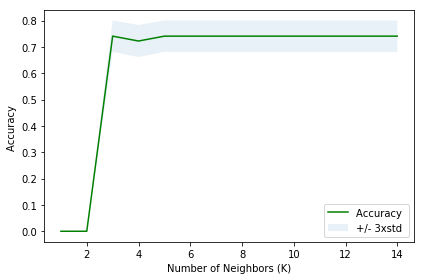

In [31]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [32]:
knn_f1_score = f1_score(y_test, y_predicted, average = 'weighted').round(2)
knn_f1_score

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.63

In [33]:
#Log Loss

for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    y_predicted_knn = neigh.predict_proba(X_test)[:,1]

print(y_predicted_knn)

[0.71428571 0.78571429 0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571 0.78571429 0.71428571 0.71428571 0.71428571 0.78571429
 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.78571429
 0.71428571 0.78571429 0.71428571 0.78571429 0.78571429 0.71428571
 0.71428571 0.78571429 0.71428571 0.71428571 0.78571429 0.71428571
 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571 0.71428571 0.71428571 0.78571429 0.71428571 0.71428571
 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571
 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571]


# Final Report

In [57]:
finalreport = {'KNN':[knn_jaccard, knn_f1_score, knn_logloss], 'Decision Tree':[acc_jacc_dt, acc_f1_dt, acc_logloss_dt], 'SVM': [acc_jacc_svm, acc_f1_svm, acc_logloss_svm], 'Logistic Regression': [acc_jacc_LR,acc_f1_LR, acc_logloss_LR]}

In [58]:
finalreport

{'Decision Tree': [0.72, 0.74, 4.14],
 'KNN': [0.74, 0.63, 0.56],
 'Logistic Regression': [0.74, 0.85, 8.95],
 'SVM': [0.74, 0.63, 0.55]}

In [59]:
Report = pd.DataFrame(finalreport, index = ['Jacard\'s Index','F1 score','Log loss'])

In [60]:
Report

,Decision Tree,KNN,Logistic Regression,SVM
Jacard's Index,0.72,0.74,0.74,0.74
F1 score,0.74,0.63,0.85,0.63
Log loss,4.14,0.56,8.95,0.55


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [64]:
yhat_rf = random_forest.predict(X_test)

In [65]:
acc_rf= round(random_forest.score(X_train, y_train)* 100, 2)
acc_rf

89.31

This is the accuracy on train data. Now, let's find accuracy on <b>test</b> data

In [66]:
acc_rf_test= round(random_forest.score(X_test, y_test)* 100, 2)
acc_rf_test

79.63